In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
values = np.array([1,3,2,4,1,6,4])

In [10]:
example_df = pd.DataFrame({
    'value': values,
    'even': values % 2 == 0,
    'above_three': values > 3
}, index=['a','b','c','d','e','f','g'])

example_df

,above_three,even,value
a,False,False,1
b,False,False,3
c,False,True,2
d,True,True,4
e,False,False,1
f,True,True,6
g,True,True,4


In [14]:
grouped_data = example_df.groupby('even')
print(grouped_data.groups)


{False: Index(['a', 'b', 'e'], dtype='object'), True: Index(['c', 'd', 'f', 'g'], dtype='object')}


In [15]:
grouped_data = example_df.groupby(['even', 'above_three'])
print(grouped_data.groups)

{(False, False): Index(['a', 'b', 'e'], dtype='object'), (True, False): Index(['c'], dtype='object'), (True, True): Index(['d', 'f', 'g'], dtype='object')}


In [16]:
grouped_data = example_df.groupby('even')
print(grouped_data.sum())

       above_three  value
even                     
False          0.0      5
True           3.0     16


In [17]:
# Limit column in result
print(grouped_data.sum()['value'])

even
False     5
True     16
Name: value, dtype: int64


In [18]:
# Or

print(grouped_data['value'].sum())

even
False     5
True     16
Name: value, dtype: int64


In [22]:
filename = './nyc-subway-weather.csv'
subway_df = pd.read_csv(filename)
print(subway_df)

       UNIT     DATEn     TIMEn  ENTRIESn   EXITSn  ENTRIESn_hourly  \
0      R003  05-01-11  00:00:00   4388333  2911002              0.0   
1      R003  05-01-11  04:00:00   4388333  2911002              0.0   
2      R003  05-01-11  12:00:00   4388333  2911002              0.0   
3      R003  05-01-11  16:00:00   4388333  2911002              0.0   
4      R003  05-01-11  20:00:00   4388333  2911002              0.0   
5      R003  05-02-11  00:00:00   4388348  2911036             15.0   
6      R003  05-02-11  04:00:00   5818689  3874767             19.0   
7      R003  05-02-11  08:00:00   4388855  2911194            488.0   
8      R003  05-02-11  12:00:00   4389345  2911326            490.0   
9      R003  05-02-11  16:00:00   4389576  2911558            231.0   
10     R003  05-02-11  20:00:00   4389811  2911963            235.0   
11     R003  05-03-11  00:00:00   4389885  2912127             74.0   
12     R003  05-03-11  04:00:00   4389905  2912160             20.0   
13    

In [28]:
date_group = subway_df.groupby('DATEn')
print(date_group.sum())

             ENTRIESn       EXITSn  ENTRIESn_hourly  EXITSn_hourly   hour  \
DATEn                                                                       
05-01-11  38565022276  27345692924        1563693.0      1203738.0  13736   
05-02-11  39463011521  27894553406        2806944.0      2007287.0  13820   
05-03-11  39821027851  28075652328        3183128.0      2239759.0  14036   
05-04-11  37843655597  26910821438        3118915.0      2239568.0  13816   
05-05-11  38563066215  27164708848        3199002.0      2250004.0  13896   
05-06-11  38462251936  27265511977        3179032.0      2275173.0  13840   
05-07-11  38261851781  26990731233        1877545.0      1421264.0  13520   
05-08-11  38652520566  27235232152        1400098.0      1093788.0  13512   
05-09-11  39922868068  28079392935        2834785.0      2000888.0  14004   
05-10-11  39536776953  28044939545        3090088.0      2185671.0  13988   
05-11-11  37181910629  26317028749        3169092.0      2240992.0  13648   

In [33]:
print(date_group.sum()['ENTRIESn_hourly'])

DATEn
05-01-11    1563693.0
05-02-11    2806944.0
05-03-11    3183128.0
05-04-11    3118915.0
05-05-11    3199002.0
05-06-11    3179032.0
05-07-11    1877545.0
05-08-11    1400098.0
05-09-11    2834785.0
05-10-11    3090088.0
05-11-11    3169092.0
05-12-11    3201840.0
05-13-11    3114960.0
05-14-11    1906123.0
05-15-11    1413929.0
05-16-11    2866698.0
05-17-11    3032183.0
05-18-11    3139070.0
05-19-11    3136296.0
05-20-11    3108151.0
05-21-11    1966083.0
05-22-11    1419988.0
05-23-11    2877108.0
05-24-11    3068006.0
05-25-11    3165614.0
05-26-11    3172004.0
05-27-11    3009536.0
05-28-11    1737156.0
05-29-11    1420998.0
05-30-11    1409572.0
05-31-11    2873538.0
Name: ENTRIESn_hourly, dtype: float64


Populating the interactive namespace from numpy and matplotlib


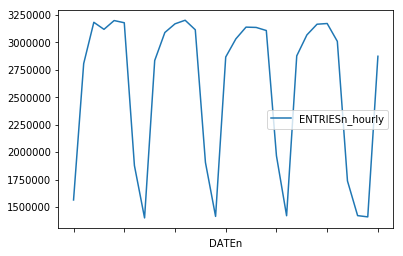

In [40]:
%pylab inline
date_group.sum()['ENTRIESn_hourly'].plot(
    kind='line', legend = True)

In [42]:
week_group = subway_df.groupby('day_week').mean()['ENTRIESn_hourly']


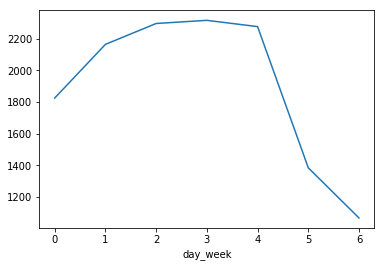

In [43]:
week_group.plot()